In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('winequality-white.csv',sep=';')

X=dataset.iloc[:,:-1].values

y=dataset.iloc[:,11:12].values

In [3]:
#Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)


In [5]:
#Appending a column of ones to matrix X
ones_train=pd.DataFrame(np.ones((3918,1)))
ones_test=pd.DataFrame(np.ones((980,1)))

X_train=pd.concat([ones_train,pd.DataFrame(X_train)],ignore_index=True,axis=1).iloc[:].values
X_test=pd.concat([ones_test,pd.DataFrame(X_test)],ignore_index=True,axis=1).iloc[:].values


In [6]:
#Here we have 11 features and one column of ones which will contribute to our constant term in our regression eqn
Theta=np.random.rand(12,1)


In [7]:
#Our cost function is the sum of squared errors

def cost(x,theta,Y):
    m=x.shape[0]
    n=x.shape[1]
    cost = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - Y))
    cost=round(cost,2)
    return cost


#Using batch gradientDescent

def gradientDescent(x,thetao,Y,iterations,alpha):
    m=x.shape[0]
    n=x.shape[1]
    theta=np.zeros((12,1))
    costs=[]
    theta=thetao-(alpha/m)*np.dot(x.T,(np.dot(x,thetao)-Y))
    for i in range(iterations):
        theta=theta-(alpha/m)*np.dot(x.T,(np.dot(x,theta)-Y))
        #theta = theta - (alpha / m) * (np.dot(X, theta) - y)
        costs.append(cost(x,theta,Y))
        
    return theta,costs



In [11]:
#Running Gradient descent
thetaP,costs=gradientDescent(X_train,Theta,y_train,500,0.01)


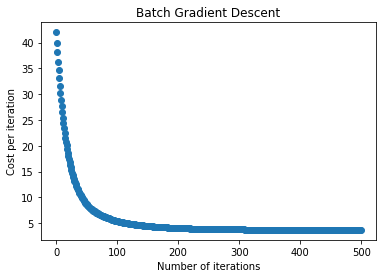

In [12]:
#Plotting cost function vs num of iterations for Batch Gradient Descent
x=[i for i in range(500)]

plt.scatter(x,costs)
plt.title('Batch Gradient Descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost per iteration')
plt.show()

In [13]:
#Now we can find the prediction matrices as such
pred_train=(np.dot(X_train,thetaP))
pred_test=(np.dot(X_test,thetaP))


In [14]:
def SSE(pred,y):
    return np.round(np.sum(np.square(pred-y)),3)

In [15]:
#The above function calculates the sum of squared errors given predictions and ground truths for our training set
SSE(pred_train,y_train)

0.156


In [16]:
#The SSE function calculates the sum of squared errors given predictions and ground truths for our test set
SSE(pred_test,y_test)

0.298


In [17]:
#We could further reduce the error by applying overfitting & using weight decay which we will talk about 
#in our presentation